# **Exploratory Data Analysis on Spotify 2023 Dataset**
#### by: Zildjan Zatyr C. Ponce || 2ECE - A 
###### ==============================================================================================
### **1. Dataset Overview**
#### A. 2023 Spotify Dataframe


In [79]:
# Import Python libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print dataframe
spotify = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')
spotify

sns.set_style("darkgrid")

#### B. Dataset --> Rows and Columns

In [82]:
# How many rows and columns does the dataset contain?
rows = spotify.shape[0]
columns = spotify.shape[1]

# To create a dataframe to store inputs
shape_info = pd.DataFrame({
    'Data': ['Rows', 'Columns'],
    'Count': [rows, columns]
})

# Prints the dataframe
shape_info

,Data,Count
0,Rows,953
1,Columns,24


#### C. Dataset --> General Info

In [85]:
# Examine info per column containing non-null count and data type
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#### D. Dataset --> Missing Values

In [88]:
# To check if there are any missing values
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **2. Basic Descriptive Statistics**
#### A. Statistical Description

In [91]:
# Obtain a statistical summary for the numerical columns in the spotify dataframe
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


#### B. Measure of Central Tendency

In [94]:
df = pd.DataFrame(spotify)

# Convert the object datatype to numeric values
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')

# Calculate the mean, median, and standard deviation
mean = round(df['streams'].mean(), 2)
median = df['streams'].median()
std = round(df['streams'].std(), 2)

# Print the values
print(f"The Mean is: {mean}")
print(f"The Median is: {median}")
print(f"The Standard Deviation is: {std}")

The Mean is: 514137424.94
The Median is: 290530915.0
The Standard Deviation is: 566856949.04


###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **3. Spotify Top Performers**
#### A. 2023's Spotify Top Performing Artists

In [97]:
# Convert 'streams' to numeric after removing commas
spotify['streams'] = pd.to_numeric(spotify['streams'].astype(str).str.replace(',', ''), errors = 'coerce')

# Sort the top 5 streams then print
sorted_df = spotify.sort_values(by = 'streams', ascending = False).head(5).reset_index(drop = True)
sorted_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


#### B. Top Performing Artist by Track Count

In [100]:
top_artists = spotify.assign(artist = spotify['artist(s)_name'].str.split(', ')).explode('artist')

# Group by artist and count occurrences
top_5_artists = top_artists['artist'].value_counts().head(5)

# Convert to DataFrame then print
top_artists_df = top_5_artists.reset_index()
top_artists_df.columns = ['Artist', 'Track Count']
top_artists_df

,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **4. Temporal Trends**
#### A. Tracks Released Per Year

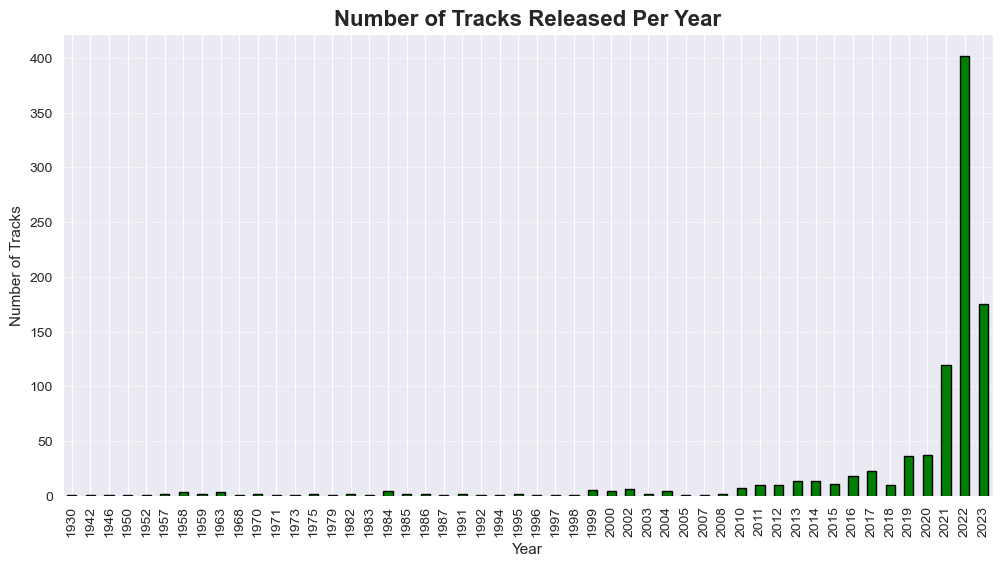

In [103]:
# Groups yearly then counts the number of tracks 
tracks_per_year = spotify['released_year'].value_counts().sort_index()

# Generates the plot
plt.figure(figsize = (12, 6))
tracks_per_year.plot(kind = 'bar', color = 'green', edgecolor = 'black')
plt.title('Number of Tracks Released Per Year', fontsize = 16, fontweight = 'bold')
plt.xlabel('Year', fontsize = 11)
plt.ylabel('Number of Tracks', fontsize = 11)
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.show()

#### B. Tracks Released by Artist Count

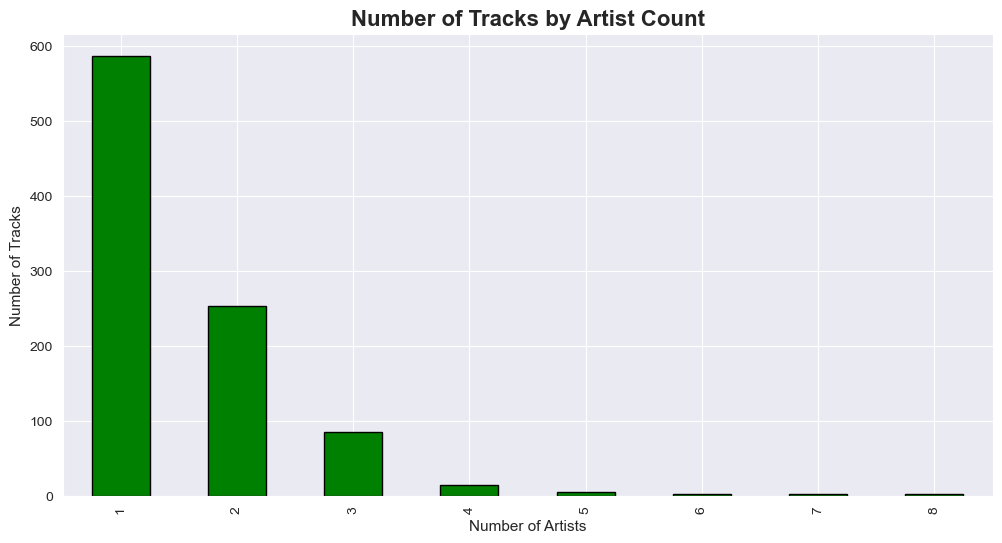

In [106]:
# Groups by year then counts the number of tracks
artist_count = spotify['artist_count'].value_counts().sort_index()

# Generates the plot
plt.figure(figsize = (12, 6))
artist_count.plot(kind = 'bar', color='green', edgecolor = 'black')
plt.title('Number of Tracks by Artist Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Artists', fontsize = 11)
plt.ylabel('Number of Tracks', fontsize = 11)
plt.show()

#### C. Yearly Average Musical Attributes

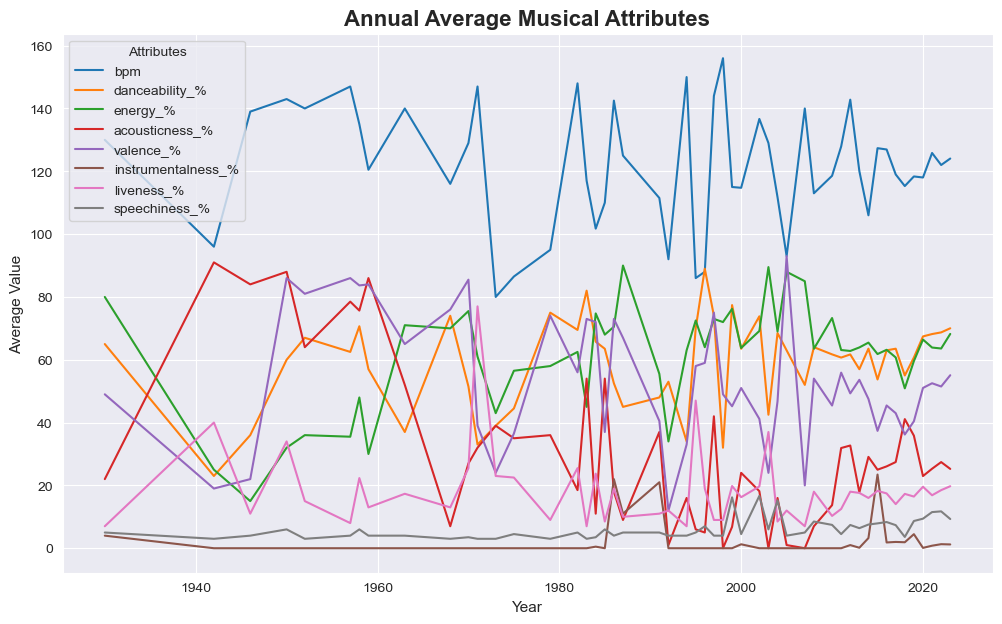

In [109]:
attributes_by_year = spotify.groupby('released_year')[['bpm', 'danceability_%', 'energy_%', 'acousticness_%', 'valence_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

# Plotting trends
plt.figure(figsize = (12, 7))
for attribute in attributes_by_year.columns:
    plt.plot(attributes_by_year.index, attributes_by_year[attribute], label = attribute)

# Generates the plot
plt.xlabel('Year', fontsize = 11)
plt.ylabel('Average Value', fontsize = 11)
plt.title('Annual Average Musical Attributes', fontsize = 16, fontweight = 'bold')
plt.legend(title = 'Attributes')
plt.grid(True)
plt.show()

#### D. Tracks Released Per Month

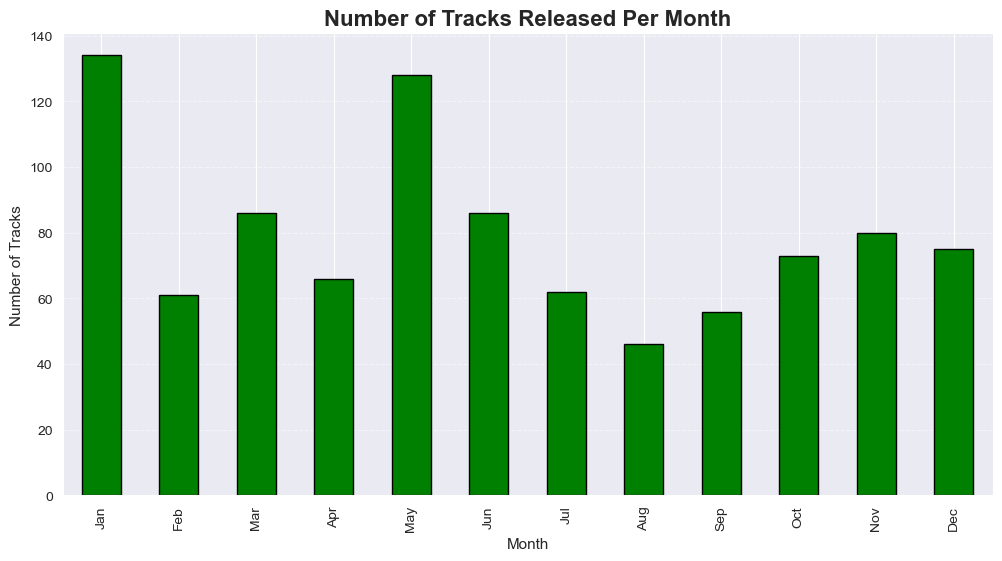

In [133]:
tracks_per_month = spotify['released_month'].value_counts().sort_index()

# Generates the plot
plt.figure(figsize = (12, 6))
tracks_per_month.plot(kind = 'bar', color='green', edgecolor = 'black')
plt.title('Number of Tracks Released Per Month', fontsize = 16, fontweight = 'bold')
plt.xlabel('Month', fontsize = 11)
plt.ylabel('Number of Tracks', fontsize = 11)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.xticks(ticks = range(12), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### E. Monthly Average Musical Attributes

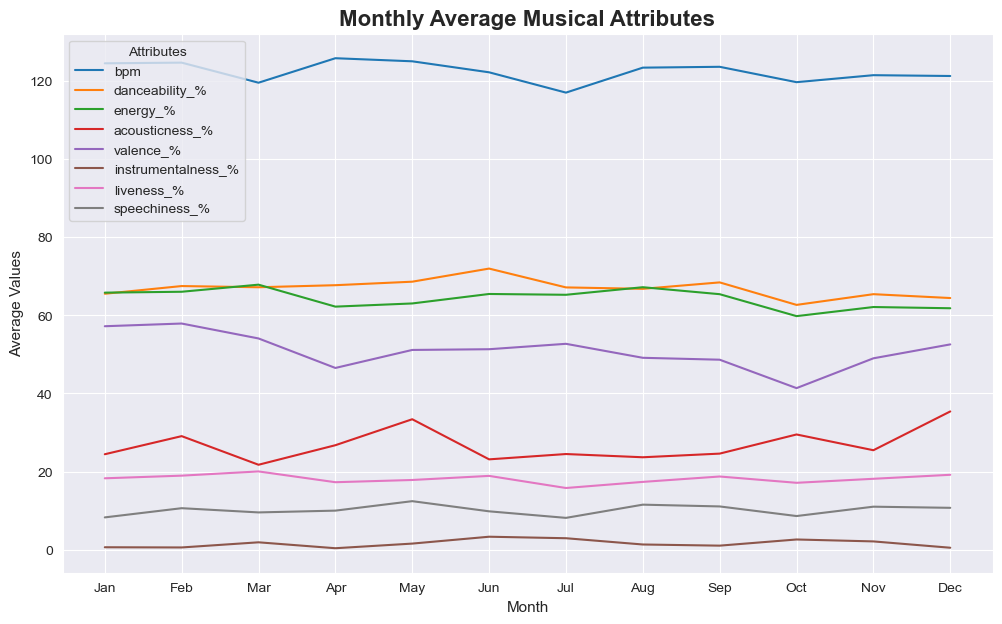

In [112]:
monthly_attributes = spotify.groupby('released_month')[['bpm', 'danceability_%', 'energy_%', 'acousticness_%', 'valence_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

# Plotting trends for each attribute using scatter plot
plt.figure(figsize = (12, 7))
for attribute in monthly_attributes.columns:
    plt.plot(monthly_attributes.index, monthly_attributes[attribute], label = attribute)

plt.xlabel('Month', fontsize = 11)
plt.ylabel('Average Values', fontsize = 11)
plt.title('Monthly Average Musical Attributes', fontsize = '16', fontweight = 'bold')
plt.legend(title = 'Attributes', loc = 'upper left')
plt.grid(True)
plt.xticks(ticks = range(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **5. Genre and Music Characteristics**
#### A. Streams vs. Musical Attributes

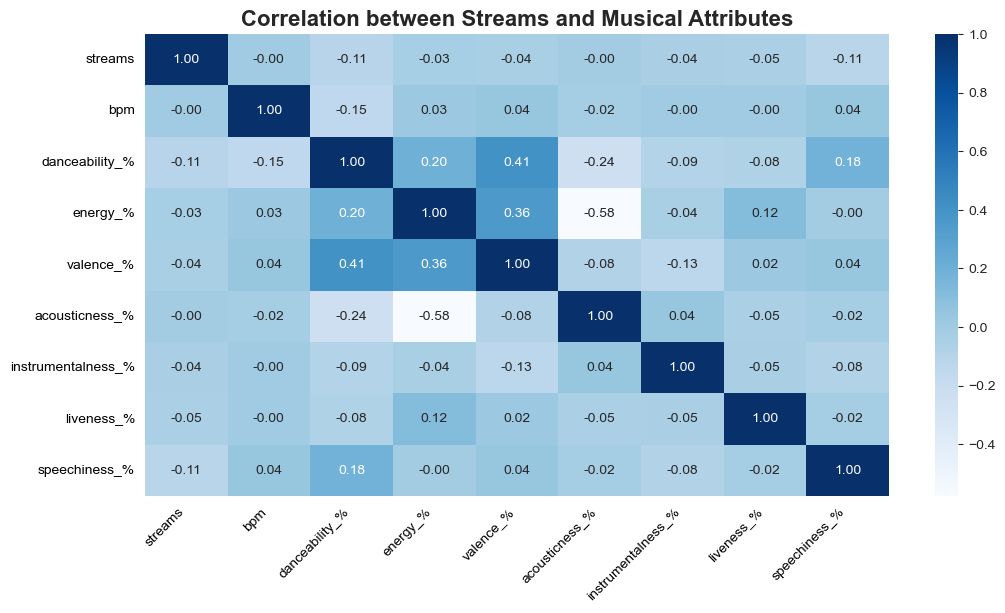

In [115]:
# Convert specified columns to numeric, coercing errors to NaN
columns_to_convert = ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
spotify[columns_to_convert] = spotify[columns_to_convert].apply(pd.to_numeric, errors = 'coerce')

# Create and display the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(spotify[columns_to_convert].corr(), annot = True, cmap = 'Blues', fmt = '.2f', 
            xticklabels = columns_to_convert, yticklabels = columns_to_convert)
plt.title('Correlation between Streams and Musical Attributes', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right', color = 'black')
plt.yticks(rotation = 0, color = 'black')
plt.show()

#### B. Danceability vs. Energy

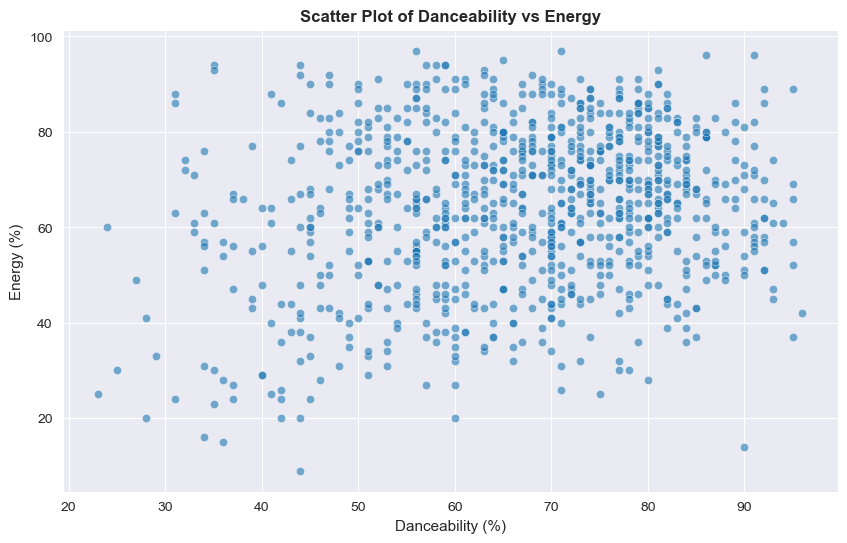

Correlation between danceability_% and energy_%: 0.20


In [117]:
# Calculate the correlation coefficient
correlation = spotify['danceability_%'].corr(spotify['energy_%'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify, x='danceability_%', y = 'energy_%', alpha = 0.6)
plt.title('Scatter Plot of Danceability vs Energy', fontsize = 12, fontweight = 'bold')
plt.xlabel('Danceability (%)', fontsize = 11)
plt.ylabel('Energy (%)', fontsize = 11)
plt.grid(True)
plt.show()

print(f'Correlation between danceability_% and energy_%: {correlation:.2f}')

#### C. Valence vs. Acousticness

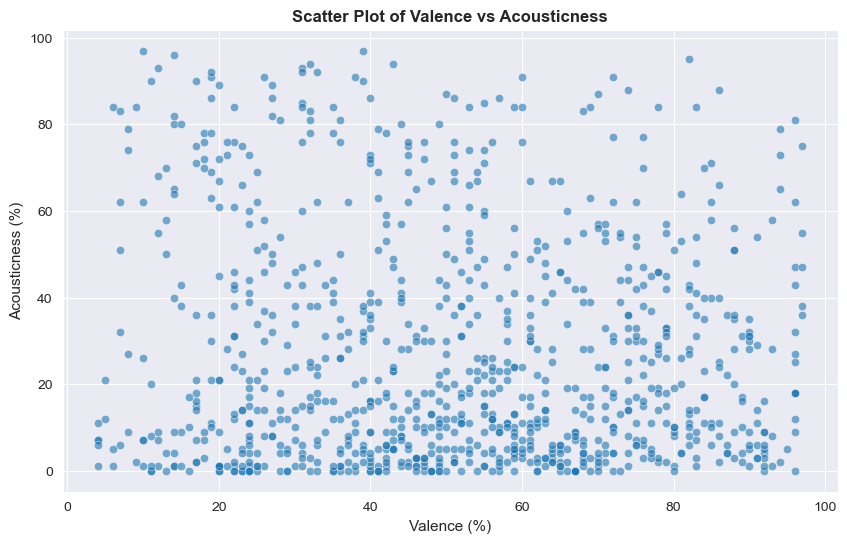

Correlation between valence_% and acousticness_%: -0.08


In [118]:
# Calculate the correlation coefficient
correlation = spotify['valence_%'].corr(spotify['acousticness_%'])

# Create a scatter plot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = spotify, x = 'valence_%', y = 'acousticness_%', alpha = 0.6)
plt.title('Scatter Plot of Valence vs Acousticness', fontsize = 12, fontweight = 'bold')
plt.xlabel('Valence (%)', fontsize = 11)
plt.ylabel('Acousticness (%)', fontsize = 11)
plt.grid(True)
plt.show()

print(f'Correlation between valence_% and acousticness_%: {correlation:.2f}')

###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **6. Platform Popularity**

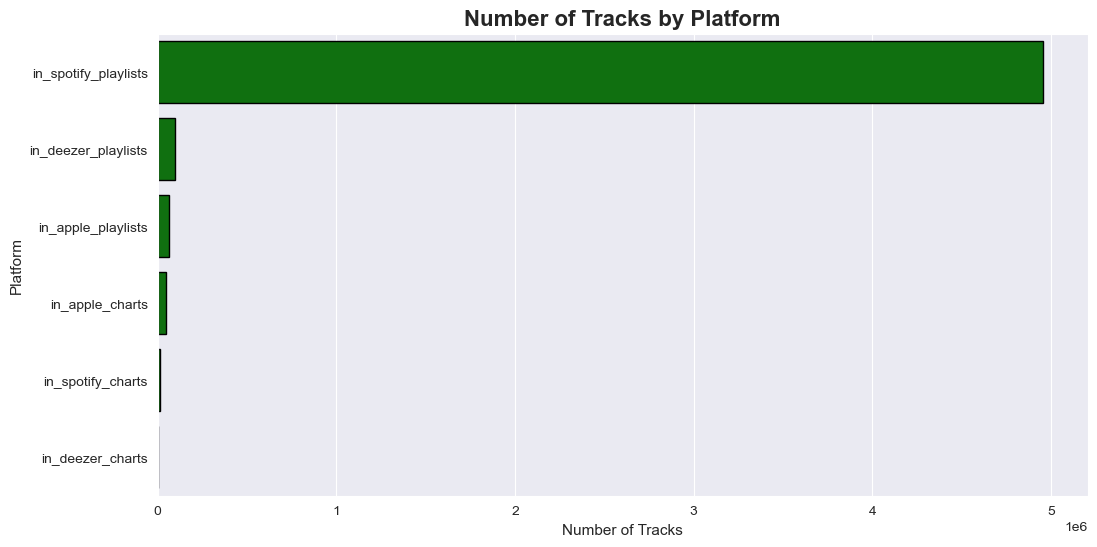

In [121]:
# Convert specified columns to numeric
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
spotify[columns_to_convert] = spotify[columns_to_convert].apply(pd.to_numeric, errors = 'coerce')

# Reshape and sort the dataframe
platform_data = spotify.melt(value_vars = columns_to_convert, var_name = 'Platform', value_name = 'Count')
platform_data = platform_data.groupby('Platform')['Count'].sum().reset_index()
platform_data = platform_data.sort_values(by = 'Count', ascending = False)

# Plotting
plt.figure(figsize = (12, 6))
sns.barplot(data = platform_data, y = 'Platform', x = 'Count', color = 'green' , edgecolor = 'black')
plt.title('Number of Tracks by Platform', fontsize = 16, fontweight = 'bold')
plt.ylabel('Platform', fontsize = 11)
plt.xlabel('Number of Tracks', fontsize = 11)
plt.show()

###### --------------------------------------------------------------------------------------------------------------------------------------------------
### **7. Advanced Analysis**
#### A. Major vs. Minor Keys Streamability

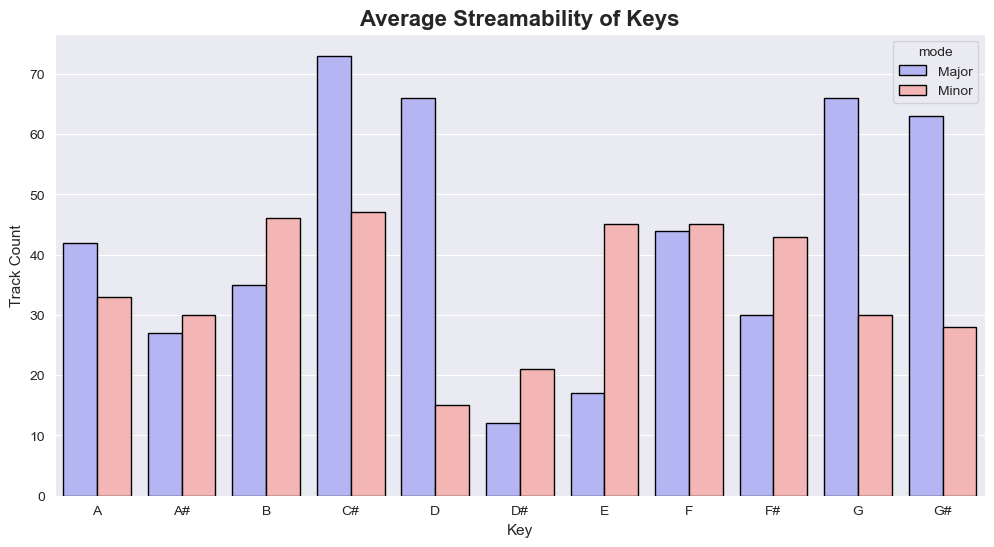

In [145]:
key_plot = spotify.groupby(['key', 'mode']).size().reset_index(name = 'Count')

# Generates the plot
plt.figure(figsize = (12, 6))
sns.barplot(data = key_plot, y = 'Count', x = 'key', hue = 'mode', palette = 'bwr', edgecolor = 'black' , dodge = True) 
plt.title('Average Streamability of Keys', fontsize = 16, fontweight = 'bold')
plt.ylabel('Track Count', fontsize = 11)
plt.xlabel('Key', fontsize = 11)
plt.legend(title = 'mode')
plt.show()

#### B. Most Frequently Appearing Artists

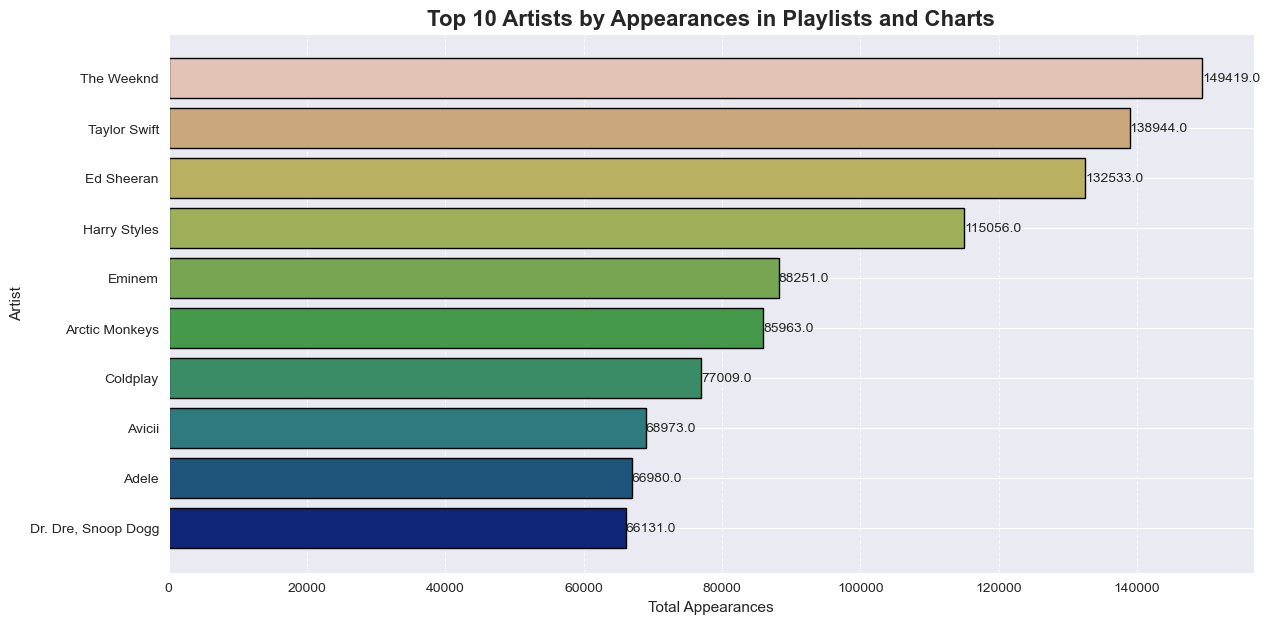

In [124]:
playlist_chart_columns = [
    'in_spotify_playlists', 
    'in_spotify_charts', 
    'in_apple_playlists', 
    'in_apple_charts', 
    'in_deezer_playlists', 
    'in_deezer_charts'
]

# Calculate total appearances of each artist across specified columns
artist_appearance_counts = spotify.groupby("artist(s)_name")[playlist_chart_columns].sum().sum(axis=1)
top_10_artists = artist_appearance_counts.nlargest(10).reset_index()
top_10_artists.columns = ['Artist', 'Total_Appearances']

# Sort the DataFrame from highest to lowest
top_10_artists = top_10_artists.sort_values(by = 'Total_Appearances', ascending = True)

# Generates the plot
plt.figure(figsize = (14, 7))
# Using plt.barh for a different approach
plt.barh(top_10_artists['Artist'], top_10_artists['Total_Appearances'], edgecolor = 'black', color=sns.color_palette("gist_earth", len(top_10_artists)))
plt.title('Top 10 Artists by Appearances in Playlists and Charts', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Appearances', fontsize = 11)
plt.ylabel('Artist', fontsize = 11)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Adds extra labels to individual bars
for index, value in enumerate(top_10_artists['Total_Appearances']):
    plt.text(value, index, str(value), va = 'center')

plt.show()